## Anamoly Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate normal sensor readings (Temperature, Vibration, Pressure)
normal_data = np.random.multivariate_normal(
    mean=[70, 0.2, 5],     # Mean values for normal operation
    cov=[[10, 0.1, 0.5],   # Covariance matrix
         [0.1, 0.05, 0.2],
         [0.5, 0.2, 2]],
    size=300               # Number of normal samples
)

# Generate abnormal (faulty) sensor readings
abnormal_data = np.random.multivariate_normal(
    mean=[90, 1.0, 10],    # Mean values for abnormal operation
    cov=[[20, 0.2, 1.0],   # Larger covariance to simulate higher variability
         [0.2, 0.1, 0.3],
         [1.0, 0.3, 3]],
    size=20                # Number of abnormal samples
)

# Combine normal and abnormal data
data = np.vstack((normal_data, abnormal_data))
labels = np.array([0] * 300 + [1] * 20)  # 0 = Normal, 1 = Abnormal

# Create a DataFrame for easier analysis
df = pd.DataFrame(data, columns=['Temperature', 'Vibration', 'Pressure'])
df['Label'] = labels

# Display the first few rows
df.head()


,Temperature,Vibration,Pressure,Label
0,68.418106,0.091043,5.106509,0
1,65.164600,0.218479,5.022828,0
2,65.076076,0.116551,3.605243,0
3,68.243253,0.325030,5.533680,0
4,69.063146,0.753590,7.601683,0


In [3]:
# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Temperature', 'Vibration', 'Pressure']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # We expect 2 clusters: normal and abnormal
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the distance of each sample to the nearest cluster center
df['DistanceToCenter'] = np.min(kmeans.transform(scaled_data), axis=1)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
# Set a threshold to identify anomalies (e.g., top 5% of points farthest from the center)
threshold = df['DistanceToCenter'].quantile(0.95)
df['Anomaly'] = df['DistanceToCenter'] > threshold

# Display the number of detected anomalies
num_anomalies = df['Anomaly'].sum()
print(f"Number of detected anomalies: {num_anomalies}")


Number of detected anomalies: 16


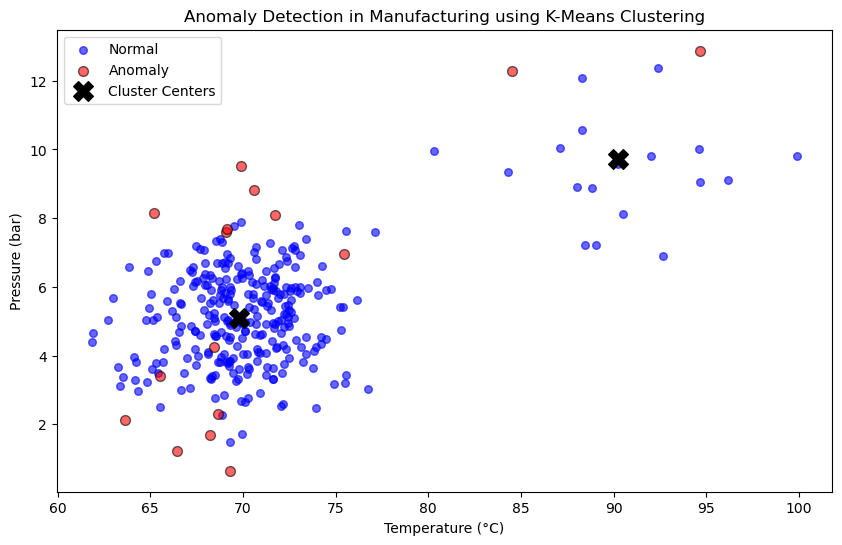

In [5]:
# Scatter plot to visualize clustering and anomalies
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normal data points
normal_points = df[df['Anomaly'] == False]
ax.scatter(normal_points['Temperature'], normal_points['Pressure'], 
           c='blue', label='Normal', alpha=0.6, s=30)

# Plot detected anomalies
anomalies = df[df['Anomaly'] == True]
ax.scatter(anomalies['Temperature'], anomalies['Pressure'], 
           c='red', label='Anomaly', alpha=0.6, s=50, edgecolor='k')

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 2], c='black', marker='X', s=200, label='Cluster Centers')

# Labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure (bar)')
ax.set_title('Anomaly Detection in Manufacturing using K-Means Clustering')
ax.legend()
plt.show()


## Inventory Management

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for inventory items
num_items = 200

# Randomly generate sales frequency (number of sales per month) and average value (in dollars)
sales_frequency = np.random.randint(1, 500, size=num_items)  # Sales frequency between 1 and 500 times per month
average_value = np.random.uniform(10, 1000, size=num_items)  # Average value between $10 and $1000

# Create a DataFrame
inventory_df = pd.DataFrame({'Item_ID': range(1, num_items + 1),
                             'Sales_Frequency': sales_frequency,
                             'Average_Value': average_value})

# Display the first few rows
inventory_df.head()


,Item_ID,Sales_Frequency,Average_Value
0,1,103,608.373205
1,2,436,544.442680
2,3,349,211.030612
3,4,271,943.425035
4,5,107,602.876812


In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(inventory_df[['Sales_Frequency', 'Average_Value']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming we want to create 3 clusters
inventory_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Unscaled):\n", cluster_centers)


Cluster Centers (Unscaled):
 [[386.46666667 344.45514088]
 [121.83636364 319.79579153]
 [221.78571429 821.02336185]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


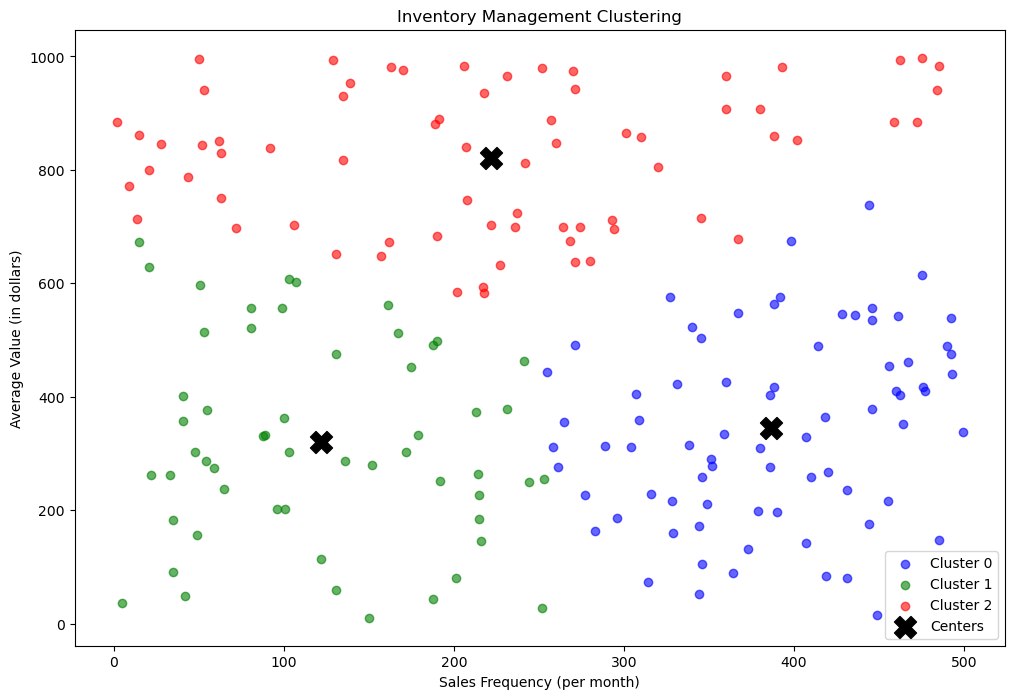

In [8]:
# Plot the clusters
plt.figure(figsize=(12, 8))

# Colors for different clusters
colors = ['blue', 'green', 'red']
for i in range(3):
    cluster_data = inventory_df[inventory_df['Cluster'] == i]
    plt.scatter(cluster_data['Sales_Frequency'], cluster_data['Average_Value'],
                label=f'Cluster {i}', alpha=0.6, c=colors[i])

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=250, marker='X', label='Centers')

# Add labels and title
plt.xlabel('Sales Frequency (per month)')
plt.ylabel('Average Value (in dollars)')
plt.title('Inventory Management Clustering')
plt.legend()
plt.show()


## Warehouse Management

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data representing item locations (aisles and shelves)
num_items = 20  # Reduced number for simplicity in this example
aisles = np.random.randint(1, 20, size=num_items)   # Random aisle numbers from 1 to 20
shelves = np.random.randint(1, 10, size=num_items)  # Random shelf numbers from 1 to 10

# Create a DataFrame to represent item locations
warehouse_df = pd.DataFrame({'Item_ID': range(1, num_items + 1),
                             'Aisle': aisles,
                             'Shelf': shelves})

# Generate synthetic co-picking data (frequency of items picked together)
# Assume that each item is picked together with a random selection of other items
order_pairs = np.random.randint(0, 10, size=(num_items, num_items))  # Random co-picking frequency matrix
np.fill_diagonal(order_pairs, 0)  # No item should be picked with itself

co_picking_df = pd.DataFrame(order_pairs, columns=warehouse_df['Item_ID'], index=warehouse_df['Item_ID'])

# Display the first few rows of co-picking data
print("Co-Picking Frequency Matrix:\n", co_picking_df.head())


Co-Picking Frequency Matrix:
 Item_ID  1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
Item_ID                                                                       
1         0   2   0   3   1   7   3   1   5   5   9   3   5   1   9   1   9   
2         8   0   4   1   4   7   9   8   8   0   8   6   8   7   0   7   7   
3         2   2   0   4   9   6   9   8   6   8   7   1   0   6   6   7   4   
4         2   0   2   0   2   0   4   9   6   6   8   9   9   2   6   0   3   
5         6   3   6   2   0   1   9   8   4   5   3   9   6   8   6   0   0   

Item_ID  18  19  20  
Item_ID              
1         3   7   6  
2         2   0   7  
3         2   7   5  
4         3   4   6  
5         8   8   3  


In [11]:
# Combine physical location data into a single matrix
X_physical = warehouse_df[['Aisle', 'Shelf']].values

# Normalize co-picking matrix values to make them compatible with physical distances
co_picking_normalized = co_picking_df / co_picking_df.max().max()

# Define a function to calculate the combined Chebyshev distance matrix incorporating co-picking frequency
def combined_chebyshev_distance(X_physical, co_picking_normalized, weight=0.5):
    # Calculate Chebyshev distance for physical locations
    chebyshev_distance_physical = squareform(pdist(X_physical, metric='chebyshev'))
    
    # Convert normalized co-picking matrix into a distance matrix
    co_picking_distance = 1 - co_picking_normalized.to_numpy()  # Convert frequency to distance (1 - similarity)
    
    # Combine both distances using a weighted approach
    combined_distance = (weight * chebyshev_distance_physical) + ((1 - weight) * co_picking_distance)
    
    return combined_distance

# Calculate the combined distance matrix
combined_distance_matrix = combined_chebyshev_distance(X_physical, co_picking_normalized, weight=0.5)


In [12]:
# Define a custom Agglomerative Clustering model using the combined distance matrix
agg_clustering = AgglomerativeClustering(
    n_clusters=4,               # Number of clusters we want
    affinity='precomputed',     # Specify that we provide a precomputed distance matrix
    linkage='complete'          # Complete linkage works well with Chebyshev distances
)

# Fit the model using the combined distance matrix
labels = agg_clustering.fit_predict(combined_distance_matrix)

# Add the cluster labels to the original warehouse data
warehouse_df['Cluster'] = labels


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


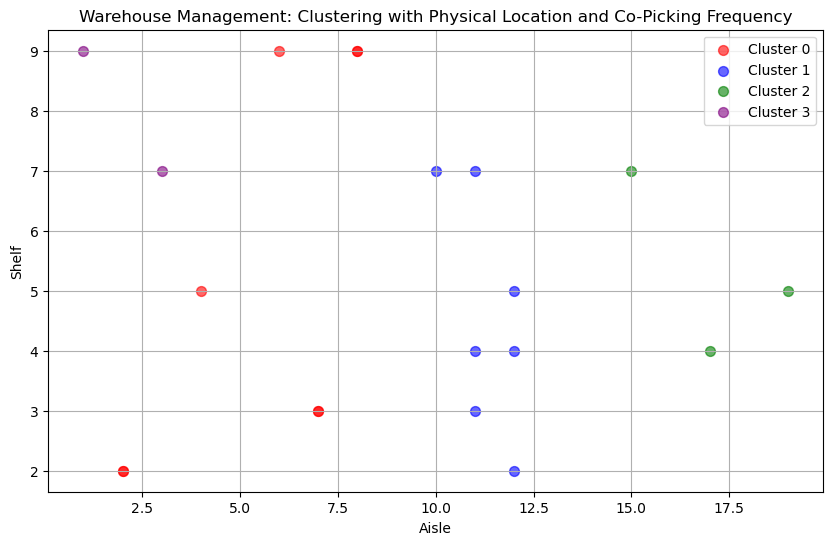

In [13]:
# Plot the clustered warehouse items
plt.figure(figsize=(10, 6))

# Assign different colors to each cluster
colors = ['red', 'blue', 'green', 'purple']
for cluster in range(4):
    cluster_data = warehouse_df[warehouse_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Aisle'], cluster_data['Shelf'], 
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, s=50)

# Add labels and title
plt.xlabel('Aisle')
plt.ylabel('Shelf')
plt.title('Warehouse Management: Clustering with Physical Location and Co-Picking Frequency')
plt.legend()
plt.grid(True)
plt.show()
